# HARALICK TEXTURE
- Hu and Zernike moments were used to describe shape, while Haralick is used to describe texture.
- Good for quatigying feel, appearance or consistency of a surface, like distinguishing between smooth and rough surfaces.
- As the number of textures you want to distinguish against increases, the less and less Haralick texture features will be useful in performing the discrimination. 
- At that point, you’re better off looking at more powerful features such as Local Binary Patterns and Histogram of Oriented Gradients.

## How it works
- Computed using Gray Level Co-occurence Matrix(GLCM). The matrix characterizes texture by recording how often pairs of adjecent pixels with specific values occur in image. 
- To construct GLCM we look at pairs of adjacent pixels and number of times the pair occurs.
![Computing GLCM](../images/haralick_glcm_example.png "Computing GLCM")
- We can add four different directions for adjacency, thus giving us four matrices.
![4 Levels of Adjacency](../images/haralick_adjacency.png "Levels of adjacency")
- We can now compute features for each of GLCM, which can be used to represent contrast, correlation, dissimilarity, entropy, homogeneity and other properties.
- For each GLCM, a feature vector of 13-d or 14-d is calculated.
- The final feature is average of the 4 GLCM, to form a 13-d feature vector. The averaging makes the feature robust to change in rotation

## Pros and Cons
- Pros
    - Very fast to compute.
    - Low dimensional — requires less space to store the feature vector, and facilitates faster feature vector comparisons.
    - No parameters to tune.
- Cons:
    - Not very robust against changes in rotation.
    - Very sensitive to noise — small perturbations in the grayscale image can dramatically affect the construction of the GLCM, and thus the overall Haralick feature vector.
    - Similar to Hu moments, basic statistics are often not discriminative enough to distinguish between many different kinds of textures.

In [1]:
import sys
sys.path.append("../")

In [10]:
import mahotas
from sklearn.svm import LinearSVC
import glob 
import cv2
from cv_imshow import create_subplot, display_image
from matplotlib import pyplot as plt

In [5]:
args = {
    "training":"../images/haralick_texture/training", # 4 images per texture
    "testing": "../images/haralick_texture/testing" #1 image per texture 
}

In [6]:
data = []
labels = []

#loop over training img
for imagePath in glob.glob(args["training"] + "/*png"):
    #load and convert image to gray, then extract texture label
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    texture = imagePath[imagePath.rfind("/")+1:].split("_")[0]
    
    #extract texture features in 4 directions and take mean
    features = mahotas.features.haralick(image).mean(axis=0)
    
    #update data and labels
    data.append(features)
    labels.append(texture)

print("[INFO] training model...")
model = LinearSVC(C=10.0, random_state=42)
model.fit(data, labels)
print("[INFO] Classifying")

[INFO] training model...
[INFO] Classifying


/home/vinayak/.virtualenvs/gurus/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


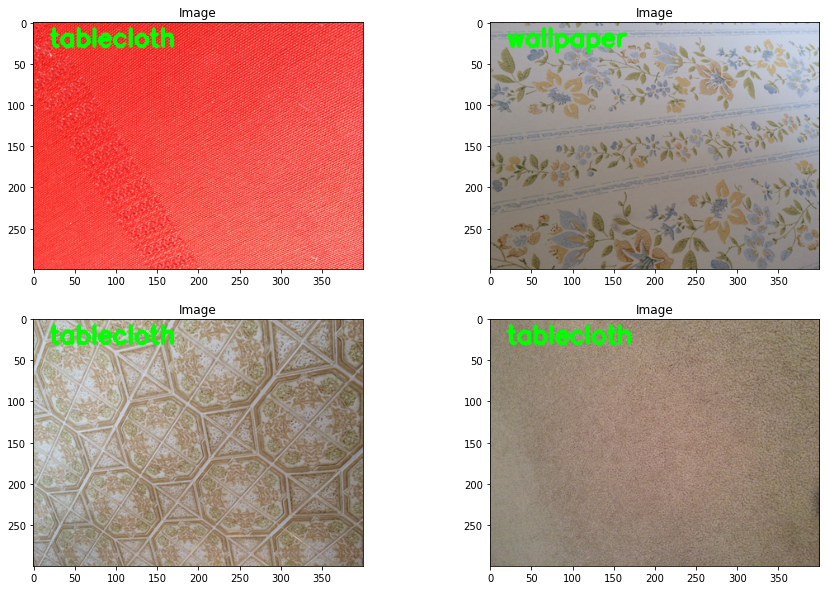

In [14]:
#loop over test images and classify
fig = plt.figure(figsize=(15,10))
rows = 2
columns = 2
for (i,imagePath) in enumerate(glob.glob(args["testing"]+"/*.png")):
    #load and convert image to gray. Extract haralick texture.
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = mahotas.features.haralick(image).mean(axis=0)
    
    #classify image
    pred = model.predict(features.reshape(1,-1))[0]
    cv2.putText(image, pred, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
               (0,255,0), 3)
    create_subplot(fig, rows, columns, i+1, "Image", image)